In [1]:
import sys
sys.path.append("..")

import pandas as pd
import ast  # Abstract Syntax Trees - safely parse string list to Python list
import seaborn as sns
import matplotlib.pyplot as plt
from reader import generic_reader

## Data wrangling

Our dataset of movies are movies from the USA, from the periode 1/1/2000 to 31/12/2023 and with a vote count of atleast 1000

In [2]:
movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies.csv")
print(movies.info())
movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   adult                   2801 non-null   bool   
 1   backdrop_path           2800 non-null   object 
 2   budget                  2801 non-null   int64  
 3   homepage                1902 non-null   object 
 4   movie_id                2801 non-null   int64  
 5   imdb_id                 2800 non-null   object 
 6   origin_country          2801 non-null   object 
 7   original_language       2801 non-null   object 
 8   original_title          2801 non-null   object 
 9   overview                2801 non-null   object 
 10  popularity              2801 non-null   float64
 11  poster_path             2800 non-null   object 
 12  production_countries    2801 non-null   object 
 13  release_date            2801 non-null   object 
 14  revenue                 2801 non-null   

,adult,backdrop_path,budget,homepage,movie_id,imdb_id,origin_country,original_language,original_title,overview,...,vote_average,vote_count,director_person_ids,genre_ids,production_company_ids,collection_id,cast_person_ids,cast_credit_ids,crew_person_ids,crew_credit_ids
0,False,/n92EzFFg2cMkJiEhnMfD5sKHSH3.jpg,80000000,http://movies.disney.com/fantasia-2000,49948,tt0120910,['US'],en,Fantasia 2000,"Blending lively music and brilliant animation,...",...,7.000,1324,"[5690, 56146, 74299, 65531, 74297, 12824, 5614...","[16, 10751, 10402]",[2],55427.0,"[67773, 166002, 13301, 73931, 15152, 37221, 74...","['52fe47b1c3a36847f814324f', '547f694292514123...","[2066428, 5690, 56146, 74299, 65531, 74297, 12...","['624f173b24f2ce009ddf2543', '52fe47b1c3a36847..."
1,False,/rNOeiC5uruGnr5n7YW8hvnrbX9q.jpg,0,NaN,10898,tt0240684,['US'],en,The Little Mermaid II: Return to the Sea,"Set several years after the first film, Ariel ...",...,6.397,1747,[60725],"[16, 12, 10751, 35]","[3475, 5391]",33085.0,"[63978, 67392, 15762, 35232, 67393, 9601, 7133...","['52fe43cc9251416c7501e85d', '52fe43cc9251416c...","[60725, 67394, 67395, 67396, 61386, 67397, 607...","['52fe43cc9251416c7501e873', '52fe43cc9251416c..."
2,False,/AbFWty0o5nKGo4iLJaGRgqFtC8W.jpg,40000000,NaN,4234,tt0134084,['US'],en,Scream 3,While Sidney Prescott and her friends visit th...,...,5.995,3807,[5140],"[27, 9648]","[7405, 85, 1600]",2602.0,"[15234, 9206, 14405, 18352, 35595, 2714, 35598...","['52fe43b4c3a36847f806911d', '52fe43b4c3a36847...","[5140, 26458, 15244, 409, 35581, 26458, 7229, ...","['52fe43b4c3a36847f80690cb', '52fe43b4c3a36847..."
3,False,/mZGwhwIwYuF0G9XLS8j23dhNfUC.jpg,23000000,https://www.uphe.com/movies/pitch-black,2787,tt0134847,['US'],en,Pitch Black,When their ship crash-lands on a remote planet...,...,6.851,4599,[28239],"[53, 878, 28]",[10201],2794.0,"[12835, 8329, 6614, 28099, 26054, 65827, 28098...","['52fe436dc3a36847f80535fd', '52fe436dc3a36847...","[28239, 13673, 28240, 9185, 63920, 63921, 1412...","['52fe436dc3a36847f805361f', '52fe436dc3a36847..."
4,False,/dA8CmAfzxVwNTcrUWTkunh7ZPqk.jpg,41300000,NaN,2069,tt0190138,['US'],en,The Whole Nine Yards,After a mobster agrees to cooperate with an FB...,...,6.465,1970,[21217],"[35, 80]","[53013, 53014]",103577.0,"[14408, 62, 57395, 2956, 61981, 2165, 7166, 16...","['52fe4331c3a36847f80418c5', '52fe4331c3a36847...","[21219, 21222, 14712, 21218, 21221, 21220, 212...","['52fe4331c3a36847f8041899', '52fe4331c3a36847..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,False,/sRLC052ieEzkQs9dEtPMfFxYkej.jpg,83000000,https://www.netflix.com/title/81464239,848326,tt14998742,['US'],en,Rebel Moon - Part One: A Child of Fire,When the ruthless forces of the Motherworld th...,...,6.242,2385,[15217],"[878, 28, 12]","[114152, 156880]",934765.0,"[568657, 91520, 1047649, 938, 21688, 1564557, ...","['61818dfd11386c002a9b6ed9', '6250b2765a07f500...","[3486271, 15217, 17285, 1005508, 2104243, 1830...","['624462cdc50ad20047008aad', '626038010792e115..."
2797,False,/bq9FpkTw9I3s1cSRuZxQibM2xOx.jpg,15000000,https://a24films.com/films/the-zone-of-interest,467244,tt7160372,['US'],en,The Zone of Interest,"The commandant of Auschwitz, Rudolf Höss, and ...",...,7.005,2304,[66728],"[18, 36, 10752]","[41077, 6705, 103376, 27543, 113962]",NaN,"[71374, 7152, 4072267, 4452138, 4072269, 40722...","['635c3ad9f28838007b15e2fe', '635c3acb88c65900...","[1341727, 4222, 70604, 1623709, 1389542, 41551...","['620956a6fab3fa0132ea9f79', '6078629118864b00..."
2798,False,/bckxSN9ueOgm0gJpVJmPQrecWul.jpg,205000000,https://www.aquamanmovie.com,572802,tt9663764,['US'],en,Aquaman and the Lost Kingdom,Black Manta seeks revenge on Aquaman for his f...,...,6.600,3223,[2127],"[28, 12, 14]","[174, 11565, 76907, 128064, 216687]",573693.0,"[117642, 17178, 1639847, 79082, 55085, 2227, 1...","['65b4239557530e0147d981bc', '5f41dea381a7fc00...","[52600, 2127, 36, 1354914, 1545447, 62813, 212...","['60774e1d19ab59004062d106', '6078ca802f

We make a new dataframe keeping only the columns we want to use.
While making the dataframe we also change the genre_ids, cast_person_ids and crew_person_id from a string to Python lists and the release_date into a proper datetime format.

In [3]:
columns_to_keep = ['budget', 'movie_id', 'original_title', 'overview', 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count', 'director_person_ids', 'genre_ids', 'collection_id', 'cast_person_ids', 'cast_credit_ids', 'crew_person_ids', 'crew_credit_ids']
df_movies = movies[columns_to_keep].copy()

df_movies['genre_ids'] = movies['genre_ids'].apply(ast.literal_eval)
df_movies['cast_person_ids'] = movies['cast_person_ids'].apply(ast.literal_eval)
df_movies['crew_person_ids'] = movies['crew_person_ids'].apply(ast.literal_eval)
df_movies['director_person_ids'] = movies['director_person_ids'].apply(ast.literal_eval)
df_movies['release_date'] = pd.to_datetime(movies['release_date'])
df_movies

,budget,movie_id,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,director_person_ids,genre_ids,collection_id,cast_person_ids,cast_credit_ids,crew_person_ids,crew_credit_ids
0,80000000,49948,Fantasia 2000,"Blending lively music and brilliant animation,...",2000-01-01,60655420,74,7.000,1324,"[5690, 56146, 74299, 65531, 74297, 12824, 5614...","[16, 10751, 10402]",55427.0,"[67773, 166002, 13301, 73931, 15152, 37221, 74...","['52fe47b1c3a36847f814324f', '547f694292514123...","[2066428, 5690, 56146, 74299, 65531, 74297, 12...","['624f173b24f2ce009ddf2543', '52fe47b1c3a36847..."
1,0,10898,The Little Mermaid II: Return to the Sea,"Set several years after the first film, Ariel ...",2000-01-23,0,75,6.397,1747,[60725],"[16, 12, 10751, 35]",33085.0,"[63978, 67392, 15762, 35232, 67393, 9601, 7133...","['52fe43cc9251416c7501e85d', '52fe43cc9251416c...","[60725, 67394, 67395, 67396, 61386, 67397, 607...","['52fe43cc9251416c7501e873', '52fe43cc9251416c..."
2,40000000,4234,Scream 3,While Sidney Prescott and her friends visit th...,2000-02-04,161834276,116,5.995,3807,[5140],"[27, 9648]",2602.0,"[15234, 9206, 14405, 18352, 35595, 2714, 35598...","['52fe43b4c3a36847f806911d', '52fe43b4c3a36847...","[5140, 26458, 15244, 409, 35581, 26458, 7229, ...","['52fe43b4c3a36847f80690cb', '52fe43b4c3a36847..."
3,23000000,2787,Pitch Black,When their ship crash-lands on a remote planet...,2000-02-18,53187659,108,6.851,4599,[28239],"[53, 878, 28]",2794.0,"[12835, 8329, 6614, 28099, 26054, 65827, 28098...","['52fe436dc3a36847f80535fd', '52fe436dc3a36847...","[28239, 13673, 28240, 9185, 63920, 63921, 1412...","['52fe436dc3a36847f805361f', '52fe436dc3a36847..."
4,41300000,2069,The Whole Nine Yards,After a mobster agrees to cooperate with an FB...,2000-02-18,106371651,98,6.465,1970,[21217],"[35, 80]",103577.0,"[14408, 62, 57395, 2956, 61981, 2165, 7166, 16...","['52fe4331c3a36847f80418c5', '52fe4331c3a36847...","[21219, 21222, 14712, 21218, 21221, 21220, 212...","['52fe4331c3a36847f8041899', '52fe4331c3a36847..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,83000000,848326,Rebel Moon - Part One: A Child of Fire,When the ruthless forces of the Motherworld th...,2023-12-15,0,134,6.242,2385,[15217],"[878, 28, 12]",934765.0,"[568657, 91520, 1047649, 938, 21688, 1564557, ...","['61818dfd11386c002a9b6ed9', '6250b2765a07f500...","[3486271, 15217, 17285, 1005508, 2104243, 1830...","['624462cdc50ad20047008aad', '626038010792e115..."
2797,15000000,467244,The Zone of Interest,"The commandant of Auschwitz, Rudolf Höss, and ...",2023-12-15,52631884,105,7.005,2304,[66728],"[18, 36, 10752]",NaN,"[71374, 7152, 4072267, 4452138, 4072269, 40722...","['635c3ad9f28838007b15e2fe', '635c3acb88c65900...","[1341727, 4222, 70604, 1623709, 1389542, 41551...","['620956a6fab3fa0132ea9f79', '6078629118864b00..."
2798,205000000,572802,Aquaman and the Lost Kingdom,Black Manta seeks revenge on Aquaman for his f...,2023-12-20,440181226,124,6.600,3223,[2127],"[28, 12, 14]",573693.0,"[117642, 17178, 1639847, 79082, 55085, 2227, 1...","['65b4239557530e0147d981bc', '5f41dea381a7fc00...","[52600, 2127, 36, 1354914, 1545447, 62813, 212...","['60774e1d19ab59004062d106', '6078ca802faf4d00..."
2799,25000000,1072790,Anyone But You,"After an amazing first date, Bea and Ben’s fie...",2023-12-21,214891370,103,6.837,2735,[82511],"[10749, 35]",NaN,"[115440, 83271, 3085680, 2728596, 2495673, 125...","['63bf14f4df857c0089269b1a', '63bf1503df857c00...","[1963222, 1325188, 2761446, 4321486, 4321489, ...","['652be8e4f2883802a25e99af', '652be8fa358da700..."


We won't do any clean to the column Collection_id because it is for movies in a collection, like The Lord of the Rings: Fellowship of the Ring, The Lord of the Rings: The Two Towers and The Lord of the Rings: The Return of the King

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget               2801 non-null   int64         
 1   movie_id             2801 non-null   int64         
 2   original_title       2801 non-null   object        
 3   overview             2801 non-null   object        
 4   release_date         2801 non-null   datetime64[ns]
 5   revenue              2801 non-null   int64         
 6   runtime              2801 non-null   int64         
 7   vote_average         2801 non-null   float64       
 8   vote_count           2801 non-null   int64         
 9   director_person_ids  2801 non-null   object        
 10  genre_ids            2801 non-null   object        
 11  collection_id        894 non-null    float64       
 12  cast_person_ids      2801 non-null   object        
 13  cast_credit_ids      2801 non-nul

We check the min value of the budget to see if any are missing 

In [5]:
print(df_movies['budget'].min())
print(df_movies.shape)

0
(2801, 16)


We'll check if any of the budget and revenue have the default 0

In [6]:
zero_budget_count = (df_movies['budget'] == 0).sum()
zero_revenue_count = (df_movies['revenue'] == 0).sum()

print(f"Rows with budget = 0: {zero_budget_count}")
print(f"Rows with revenue = 0: {zero_revenue_count}")

Rows with budget = 0: 308
Rows with revenue = 0: 304


Since we have a large set of data and the difference movies can have in budget and revenue, we'll drop the rows with a budget or renvenue of zero to stay as close to the true data as possible

In [7]:
df_movies = df_movies[(df_movies['budget'] != 0) & (df_movies['revenue'] != 0)].copy()

Genre ids seems to have a fine spread

In [8]:
df_movies['genre_ids'].explode().value_counts()

genre_ids
18       909
35       838
28       774
53       727
12       614
878      390
80       386
10749    374
14       334
27       329
10751    324
9648     237
16       197
36       119
10752     63
10402     57
37        26
99         5
10770      1
Name: count, dtype: int64

We also check for runtime to make sure no tv series have made its way into the data by a mistake

In [9]:
runtime = (df_movies['runtime'] <= 60).sum()
print(runtime)

0


Data about actors and actress will come from persons.csv

In [10]:
df_persons = generic_reader.read_csv_file_to_data_frame("movie_data/persons.csv")
print(df_persons.info())
df_persons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12475 entries, 0 to 12474
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 12475 non-null  bool   
 1   also_known_as         12475 non-null  object 
 2   biography             9339 non-null   object 
 3   birthday              9894 non-null   object 
 4   deathday              548 non-null    object 
 5   gender                12475 non-null  int64  
 6   homepage              1833 non-null   object 
 7   person_id             12475 non-null  int64  
 8   imdb_id               12149 non-null  object 
 9   known_for_department  12475 non-null  object 
 10  name                  12475 non-null  object 
 11  place_of_birth        9994 non-null   object 
 12  popularity            12475 non-null  float64
 13  profile_path          11651 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 1.2+ MB
Non

,adult,also_known_as,biography,birthday,deathday,gender,homepage,person_id,imdb_id,known_for_department,name,place_of_birth,popularity,profile_path
0,False,"['George Walton Lucas Jr. ', 'George Walton Lu...","George Walton Lucas Jr. (born May 14, 1944) is...",1944-05-14,NaN,2,NaN,1,nm0000184,Directing,George Lucas,"Modesto, California, USA",1.6016,/mDLDvsx8PaZoEThkBdyaG1JxPdf.jpg
1,False,"['Mark Hamil', 'Mark Richard Hamill', 'Patrick...","Mark Richard Hamill (born September 25, 1951) ...",1951-09-25,NaN,2,NaN,2,nm0000434,Acting,Mark Hamill,"Oakland, California, USA",2.3873,/2ZulC2Ccq1yv3pemusks6Zlfy2s.jpg
2,False,['Harrison J. Ford'],Legendary Hollywood Icon Harrison Ford was bor...,1942-07-13,NaN,2,NaN,3,nm0000148,Acting,Harrison Ford,"Chicago, Illinois, USA",3.1719,/zVnHagUvXkR2StdOtquEwsiwSVt.jpg
3,False,"['Carrie Frances Fisher ', 'Кэрри Фрэнсис Фише...","Carrie Frances Fisher (October 21, 1956 – Dece...",1956-10-21,2016-12-27,1,https://carriefisher.com/,4,nm0000402,Acting,Carrie Fisher,"Beverly Hills, Los Angeles, California, USA",0.8295,/awb4UqzT6meD3JiQlraIzAqcRtH.jpg
4,False,"['林-曼努尔·米兰达', 'لین-منوئل میراندا']",Lin-Manuel Miranda (/mænˈwɛl/; born January 16...,1980-01-16,NaN,2,http://www.linmanuel.com/,1179651,nm0592135,Acting,Lin-Manuel Miranda,"Manhattan, New York City, New York, USA",1.1104,/r0wFwPa041pZ1QM66yJWuQXCkqx.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12470,False,"['Roxanna Ortega', 'Roxanne Ortega']",NaN,NaN,NaN,1,http://roxanaortega.com/,98292,nm0650945,Acting,Roxana Ortega,"Los Angeles, California, USA",0.2401,/tAkMeufq6ruljugyHhjvtIe72H4.jpg
12471,False,[],NaN,1968-12-21,NaN,2,NaN,65525,nm0564586,Directing,Howard McCain,NaN,0.9515,NaN
12472,False,[],"Cynthia Stevenson (born August 2, 1962 in Oakl...",1962-08-02,NaN,1,NaN,65528,nm0828906,Acting,Cynthia Stevenson,"Piedmont, California, USA",0.9425,/zdrsUVw9F0U4onvh1rS1AQor4wp.jpg
12473,False,['Egidio Cafarelli '],Gino Cafarelli (born 28 February 1969) is an A...,1969-02-28,NaN,2,NaN,1179643,nm1388699,Acting,Gino Cafarelli,"Queens, New York City, New York, USA",0.2527,/x9sMMZ9BSL21eYXCvYuLXgM3Glr.jpg


In [11]:
columns_to_keep = ['name', 'birthday', 'deathday', 'gender', 'person_id', 'known_for_department']
df_persons = df_persons[columns_to_keep].copy()
df_persons['birthday'] = pd.to_datetime(df_persons['birthday'])
df_persons['deathday'] = pd.to_datetime(df_persons['deathday'])
df_persons

,name,birthday,deathday,gender,person_id,known_for_department
0,George Lucas,1944-05-14,NaT,2,1,Directing
1,Mark Hamill,1951-09-25,NaT,2,2,Acting
2,Harrison Ford,1942-07-13,NaT,2,3,Acting
3,Carrie Fisher,1956-10-21,2016-12-27,1,4,Acting
4,Lin-Manuel Miranda,1980-01-16,NaT,2,1179651,Acting
...,...,...,...,...,...,...
12470,Roxana Ortega,NaT,NaT,1,98292,Acting
12471,Howard McCain,1968-12-21,NaT,2,65525,Directing
12472,Cynthia Stevenson,1962-08-02,NaT,1,65528,Acting
12473,Gino Cafarelli,1969-02-28,NaT,2,1179643,Acting


Like with the release date of movies, we now change birthday and deathday to a date format.
Then we will be dropping actors/actresses which have no data for birthday as we'll need it

!OBS! Det kan være vi skal vente med at droppe de persom til vi sidder med beregningerne, det kan vi lige snakke om 

In [12]:
df_persons['birthday'] = pd.to_datetime(df_persons['birthday'], errors='coerce')
df_persons['deathday'] = pd.to_datetime(df_persons['deathday'], errors='coerce')

birthday_nat_count = df_persons['birthday'].isna().sum()

print(f"'NaT' in 'birthday' column: {birthday_nat_count}")

'NaT' in 'birthday' column: 2581


In [13]:
df_persons = df_persons[pd.notna(df_persons['birthday'])].copy()

We add an 'age' column, calculating it as of December 31, 2023 for persons without a death date, which is the cutoff for movies

In [14]:
def calculate_age_from_row(row):
    birthday = row['birthday']
    deathday = row['deathday']
    
    if pd.isna(deathday):
        end_date = pd.to_datetime('2023-12-31')
    else:
        end_date = deathday
    
    age = end_date.year - birthday.year - ((end_date.month, end_date.day) < (birthday.month, birthday.day))
    return age


df_persons['age'] = df_persons.apply(calculate_age_from_row, axis=1)
df_persons.sort_values(by="age", ascending=False)

,name,birthday,deathday,gender,person_id,known_for_department,age
1188,Earl Cameron,1917-08-18,2020-07-03,2,2246,Acting,102
11826,Mae LaBorde,1909-05-13,2012-01-09,1,63217,Acting,102
8027,Ellen Albertini Dow,1913-11-16,2015-05-04,1,85171,Acting,101
1350,Eva Marie Saint,1924-07-04,NaT,1,2639,Acting,99
2722,Betty White,1922-01-17,2021-12-31,1,71727,Acting,99
...,...,...,...,...,...,...,...
5795,Hugo Lavoie,2015-06-14,NaT,2,2143772,Acting,8
9335,Piper Rubio,2015-09-16,NaT,1,2283930,Acting,8
5796,Lucas Lavoie,2015-06-14,NaT,2,2143771,Acting,8
92,Emma Volk,2016-01-01,NaT,1,2785418,Acting,7


Lastly we add the column movie_count to the df_persons.  
This include all movies they have been part of as both cast and direcetor.  
First we turn the lists from director_person_ids and cast_person_ids into individual rows.  
Then we rename the director_person_ids and cast_person_ids into person_id.  
Combining the to dataframes into one.  
Then we count the how many times an id appears and map it the column movie_count in the df_persons.

In [15]:
cast_counts = df_movies[['cast_person_ids']].explode('cast_person_ids')
director_counts = df_movies[['director_person_ids']].explode('director_person_ids')

cast_counts = cast_counts.rename(columns={'cast_person_ids': 'person_id'})
director_counts = director_counts.rename(columns={'director_person_ids': 'person_id'})

all_counts = pd.concat([cast_counts, director_counts], ignore_index=True)

person_movie_count = all_counts['person_id'].value_counts()

df_persons['movie_count'] = df_persons['person_id'].map(person_movie_count).fillna(0).astype(int)

In [16]:
asd = (df_persons['movie_count'] == 0).sum()
print(asd)

628


Dropping persons which have movie_count of 0.

In [17]:
df_persons = df_persons[(df_persons['movie_count'] != 0)].copy()

The cleaning process results in two dataframes, df_movies and df_persons.  
df_movies contain 2406 movies and df_persons contain 9266 acotrs/actresses/directors.

In [18]:
print("df_persons:", df_persons.shape)
print("df_movies:", df_movies.shape)

df_persons: (9266, 8)
df_movies: (2406, 16)


Remeber to delete this part when joining

## Scatterplot part !

In [19]:
#df_movies.to_csv("movie_data/df_movies_clean.csv", index=False)
#df_persons.to_csv("movie_data/df_persons_clean.csv", index=False)

In [20]:
df_movies_first = df_movies.copy()

# Replace list columns with just the first element and rename
df_movies_first['cast_person_id'] = df_movies_first['cast_person_ids'].str[0].astype('Int64')
df_movies_first['director_person_id'] = df_movies_first['director_person_ids'].str[0].astype('Int64')

# Drop the old list columns if you don’t need them anymore
df_movies_first = df_movies_first.drop(columns=['cast_person_ids', 'director_person_ids'])

#print(df_movies_first[['cast_person_id', 'director_person_id']].head())

In [21]:
df_persons_first = df_persons.copy()

# Merge df_movies_first with df_persons on cast_person_id = person_id
df_movies_cast = df_movies_first.merge(
    df_persons_first,
    left_on="cast_person_id",
    right_on="person_id",
    how="left",
    suffixes=("", "_cast")
)

# Show result
df_movies_cast.head()

,budget,movie_id,original_title,overview,release_date,revenue,runtime,vote_average,vote_count,genre_ids,...,cast_person_id,director_person_id,name,birthday,deathday,gender,person_id,known_for_department,age,movie_count
0,80000000,49948,Fantasia 2000,"Blending lively music and brilliant animation,...",2000-01-01,60655420,74,7.000,1324,"[16, 10751, 10402]",...,67773,5690,Steve Martin,1945-08-14,NaT,2.0,67773.0,Acting,78.0,8.0
1,40000000,4234,Scream 3,While Sidney Prescott and her friends visit th...,2000-02-04,161834276,116,5.995,3807,"[27, 9648]",...,15234,5140,David Arquette,1971-09-08,NaT,2.0,15234.0,Acting,52.0,7.0
2,23000000,2787,Pitch Black,When their ship crash-lands on a remote planet...,2000-02-18,53187659,108,6.851,4599,"[53, 878, 28]",...,12835,28239,Vin Diesel,1967-07-18,NaT,2.0,12835.0,Acting,56.0,25.0
3,41300000,2069,The Whole Nine Yards,After a mobster agrees to cooperate with an FB...,2000-02-18,106371651,98,6.465,1970,"[35, 80]",...,14408,21217,Matthew Perry,1969-08-19,2023-10-28,2.0,14408.0,Acting,54.0,3.0
4,90000000,2067,Mission to Mars,When the first manned mission to Mars meets wi...,2000-03-10,110983407,114,6.000,1494,"[878, 12, 18]",...,33,1150,Gary Sinise,1955-03-17,NaT,2.0,33.0,Acting,68.0,5.0


In [22]:
# Calculate age at release
df_movies_cast['age_at_release'] = df_movies_cast.apply(
    lambda row: row['release_date'].year - row['birthday'].year - 
                ((row['release_date'].month, row['release_date'].day) < (row['birthday'].month, row['birthday'].day)),
    axis=1
)

df_movies_cast[['original_title', 'release_date', 'birthday', 'age_at_release']].head()


,original_title,release_date,birthday,age_at_release
0,Fantasia 2000,2000-01-01,1945-08-14,54.0
1,Scream 3,2000-02-04,1971-09-08,28.0
2,Pitch Black,2000-02-18,1967-07-18,32.0
3,The Whole Nine Yards,2000-02-18,1969-08-19,30.0
4,Mission to Mars,2000-03-10,1955-03-17,44.0


In [23]:
df_movies_cast['budget'].dtype
df_movies_cast['budget'].describe()

count    2.406000e+03
mean     5.878345e+07
std      5.764110e+07
min      2.000000e+03
25%      2.000000e+07
50%      4.000000e+07
75%      8.000000e+07
max      5.839000e+08
Name: budget, dtype: float64

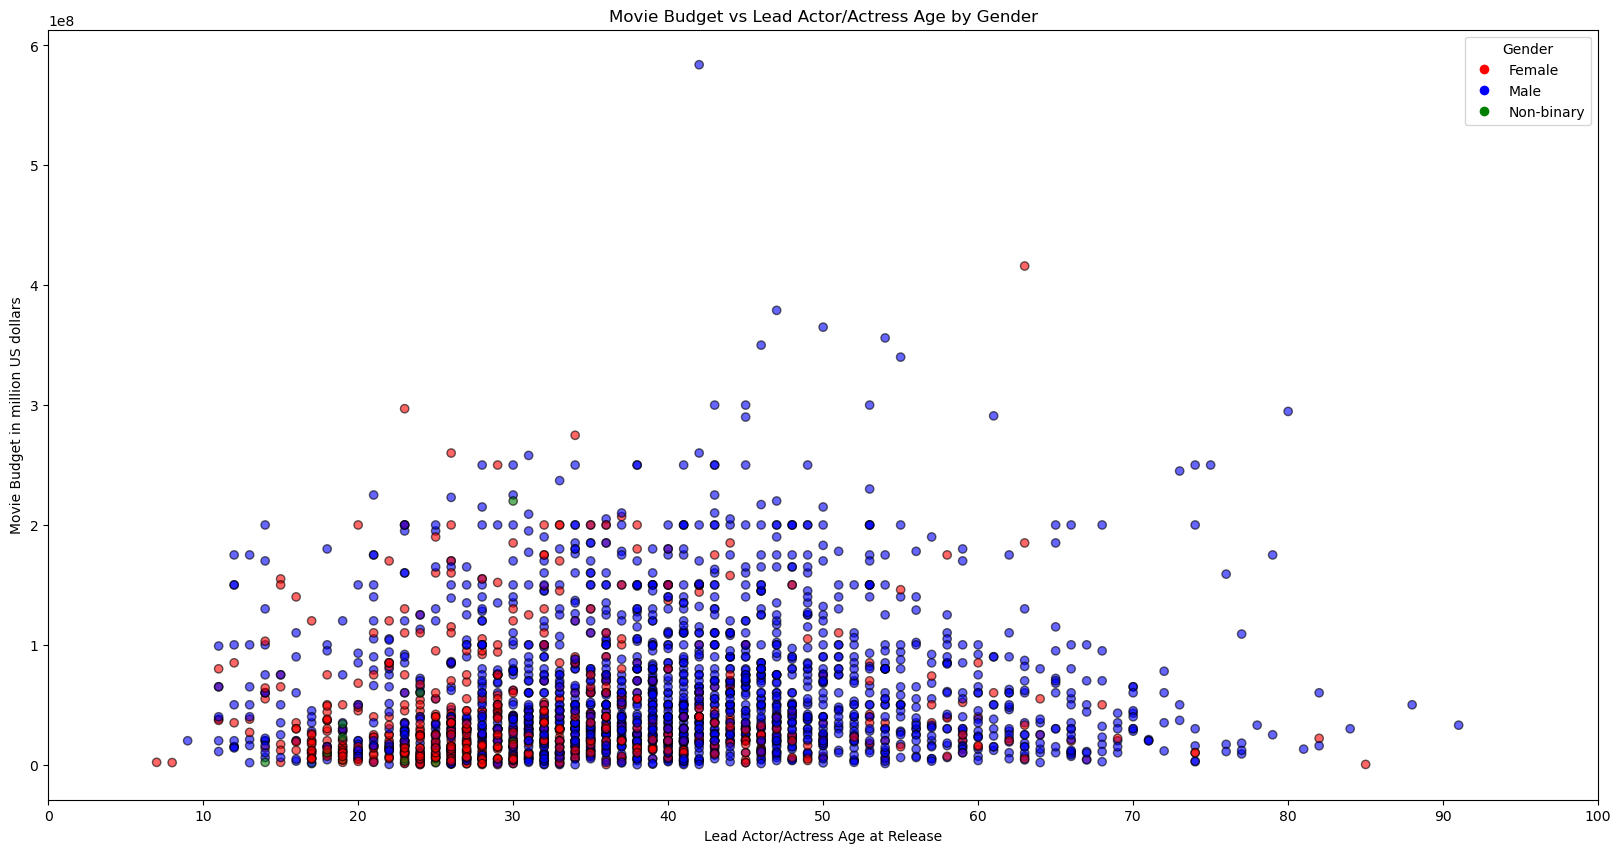

In [24]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df_movies_cast = df_movies_cast.dropna(subset=['gender'])

# Ensure gender is integer
df_movies_cast['gender_filled'] = df_movies_cast['gender'].astype(int)

gender_colors = {
    1: 'red',     # female
    2: 'blue',    # male
    3: 'green'    # non-binary
}
df_movies_cast['color'] = df_movies_cast['gender_filled'].map(gender_colors)

plt.figure(figsize=(20, 10))
plt.scatter(
    df_movies_cast['age_at_release'],
    df_movies_cast['budget'],
    c=df_movies_cast['color'],
    alpha=0.6,
    edgecolor='k'
)

plt.xlabel("Lead Actor/Actress Age at Release")
plt.ylabel("Movie Budget in million US dollars")
plt.title("Movie Budget vs Lead Actor/Actress Age by Gender")

# Set x-axis steps
plt.xticks(range(0, int(df_movies_cast['age_at_release'].max()) + 10, 10))

# Infobox
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Non-binary', markerfacecolor='green', markersize=8)
]
plt.legend(handles=legend_elements, title="Gender")

plt.show()


In [25]:
gender_labels = {0: "Unknown", 1: "Female", 2: "Male", 3: "Non-binary"}

df_movies_cast['gender_label'] = df_movies_cast['gender_filled'].astype(int).map(gender_labels)

df_movies_cast.to_csv("movie_data/to_streamlit.csv", index=False)

In [26]:
df_movies_cast['gender_filled'].map(gender_labels).value_counts()

gender_filled
Male          1758
Female         627
Non-binary      13
Name: count, dtype: int64